In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
from torchvision.datasets import EMNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset, random_split

## Downloading data

In [2]:
# Download and load the EMNIST 'balanced' split dataset
train_dataset = torchvision.datasets.EMNIST(
    root='data/',
    split='letters',
    train=True,
    download=False,
    transform=None
)

test_dataset = torchvision.datasets.EMNIST(
    root='data/',
    split='letters',
    train=False,
    download=False,
    transform=None
)

In [3]:
print(len(train_dataset))
print(len(test_dataset))

124800
20800


## Exploring Dataset

In [4]:
train_dataset[0], test_dataset[0]

((<PIL.Image.Image image mode=L size=28x28>, 23),
 (<PIL.Image.Image image mode=L size=28x28>, 1))

In [5]:
train_dataset.classes

['N/A',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [6]:
%matplotlib inline

<PIL.Image.Image image mode=L size=28x28 at 0x7F0B5E3D4950> 2
b


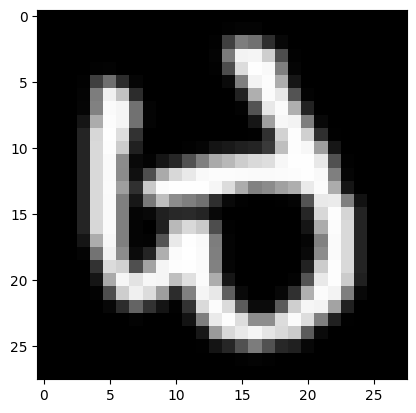

In [7]:
image, label = train_dataset[20]
print(image, label)
print((train_dataset.classes)[label])
plt.imshow(image, cmap='gray')


## Converting images to tensors

In [8]:
import torchvision.transforms as transforms

In [9]:
# Download and load the EMNIST 'balanced' split dataset
train_dataset_tensors = torchvision.datasets.EMNIST(
    root='data/',
    split='letters',
    train=True,
    download=False,
    transform=transforms.ToTensor()
)

test_dataset_tensors = torchvision.datasets.EMNIST(
    root='data/',
    split='letters',
    train=False,
    download=False,
    transform=transforms.ToTensor()
)

In [10]:
print(len(train_dataset_tensors))

124800


In [11]:
train_dataset_tensors[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0784, 0.4471, 0.4902, 0.3216, 0.1451, 0.1451,
           0.1529, 0.4510, 0.6157, 0.3686, 0.0824, 0.0392, 0.1255, 0.1451,
           0.1451, 0.1451, 0.1451, 0.1451, 

In [12]:
image, label = train_dataset_tensors[0]
image.shape

torch.Size([1, 28, 28])

## Splitting dataset into training, validation, and testing sets

In [13]:
# Define the sizes of the splits
total_size = len(train_dataset_tensors)
split_ratios = [0.6, 0.2, 0.2]  # Example: 60%, 20%, 20%
split_sizes = [int(total_size * ratio) for ratio in split_ratios]

# Adjust the last split size to match the total size exactly
split_sizes[-1] = total_size - sum(split_sizes[:-1])

# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(train_dataset_tensors, split_sizes)

In [14]:
# Create DataLoaders for each subset
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Verify the sizes of the datasets
print(f'Train dataset size: {len(train_dataset)}')
print(f'Validation dataset size: {len(val_dataset)}')
print(f'Test dataset size: {len(test_dataset)}')

Train dataset size: 74880
Validation dataset size: 24960
Test dataset size: 24960


## Making CNN Model

In [15]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [16]:
class CustomCNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(2)
        )
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(inplace=True)
        )
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(2)
        )
        self.layer4 = torch.nn.Sequential(
            torch.nn.Conv2d(128, 256, kernel_size=3, padding=1),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(inplace=True)
        )
        self.layer5 = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(256 * 7 * 7, 1024),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(1024, 512),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(512, 256),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(256, 128),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(32, 26)  # Assuming 26 output classes
        )
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        return x


In [17]:
model = CustomCNN()
print(model)

CustomCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=T

In [20]:
from torchsummary import summary

summary(model.to(device), input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
       BatchNorm2d-2           [-1, 32, 28, 28]              64
              ReLU-3           [-1, 32, 28, 28]               0
         MaxPool2d-4           [-1, 32, 14, 14]               0
            Conv2d-5           [-1, 64, 14, 14]          18,496
       BatchNorm2d-6           [-1, 64, 14, 14]             128
              ReLU-7           [-1, 64, 14, 14]               0
            Conv2d-8          [-1, 128, 14, 14]          73,856
       BatchNorm2d-9          [-1, 128, 14, 14]             256
             ReLU-10          [-1, 128, 14, 14]               0
        MaxPool2d-11            [-1, 128, 7, 7]               0
           Conv2d-12            [-1, 256, 7, 7]         295,168
      BatchNorm2d-13            [-1, 256, 7, 7]             512
             ReLU-14            [-1, 25

In [21]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.000001)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)

In [24]:
torch.manual_seed(42)
# Set the number of epochs (how many times the model will pass over the training data)
epochs = 50
# Create empty loss lists to track values
y_loss = {}
y_loss["train"] = []
y_loss["val"] = []
x_epoch = []
accuracy_vals = []

def training_loop():
    model.to(device)
    model.train()
    print(f'Epoch: {epoch + 1}')
    x_epoch.append(epoch)
    running_loss = 0.0
    epoch_loss = 0.0
    
    for (batch_idx, batch) in enumerate(train_loader):
        train_data, train_labels = batch[0].to(device), batch[1].to(device)
        train_labels = train_labels - 1
        predictions = model(train_data)
        loss = loss_fn(predictions, train_labels)
        running_loss += loss.item()
        epoch_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch_idx % 500 == 499:  # print every 5 batches
            avg_loss_across_batches = running_loss / 500
            print('Batch {0}, Loss: {1:.3f}'.format(batch_idx+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
        
    y_loss["train"].append(epoch_loss / len(train_loader))
    print()
    
def evaluation_loop():
    model.eval()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0
    for (batch_idx, batch) in enumerate(val_loader):
        test_data, test_labels = batch[0].to(device), batch[1].to(device)
        test_labels = test_labels - 1  # Adjust labels if needed
        
        with torch.inference_mode():
            test_predictions = model(test_data)
            test_loss = loss_fn(test_predictions, test_labels)
            running_loss += test_loss.item()
            
            # Use torch.argmax to get the class with the highest score
            _, predicted = torch.max(test_predictions, 1)
            total_correct += (predicted == test_labels).sum().item()  # Compare predicted and actual labels
            total_samples += test_labels.size(0)
            
            if batch_idx <= 0:
                print(predicted, test_labels)  # Print to check predictions and labels
                
    accuracy = total_correct / total_samples
    avg_loss_across_batches = running_loss / len(val_loader)
    y_loss["val"].append(avg_loss_across_batches)
    accuracy_vals.append(accuracy)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print(f'Total Correct: {total_correct}')
    print(f'Total Samples: {total_samples}')
    print('Accuracy: {0:.3f}'.format(accuracy))
    print('***************************************************')
    print()

for epoch in range(epochs):
    training_loop()
    evaluation_loop()
    scheduler.step()


Epoch: 1
Batch 500, Loss: 3.080

tensor([ 5,  5,  5,  4, 18,  5,  5, 24,  5, 24,  5,  4,  5, 24, 24,  5,  5,  5,
         5,  5,  5,  5,  4,  5,  5,  5,  5,  5,  5, 20,  5,  5, 24, 20, 20,  5,
         5, 24,  5,  5, 14,  5,  5,  5,  5, 24,  5,  5, 20,  5,  5, 20, 24, 24,
        24,  5,  5,  5, 20,  5, 20,  4,  5,  5,  5,  5,  4, 24,  5, 24, 20,  5,
        20, 24,  5,  5, 24,  5,  5,  5,  5,  5,  5,  5,  4,  5,  5, 24,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  4,  5, 20,  5,  5, 20, 24, 20, 24,
         5, 24, 20,  5, 20,  5, 24, 20,  9,  5,  5,  5, 24,  5,  5,  5, 24, 20,
         5, 20], device='cuda:0') tensor([ 9,  1, 25,  6, 24,  2, 25, 12,  7, 21,  6,  2, 10, 19,  3,  9, 19,  1,
         9, 10, 16,  7,  2,  9,  4,  5, 25,  5, 24, 20, 11,  1, 24, 25, 20, 24,
         3, 21, 23, 11, 14, 16,  6, 17, 16, 24,  5, 10, 22,  1, 19,  2, 24, 21,
        23, 18,  1, 18, 20, 18, 20,  4, 23, 17,  7, 15,  4, 12, 10, 12,  2, 15,
        22, 23,  8, 17, 24,  9, 23, 10,  1, 10, 12,  

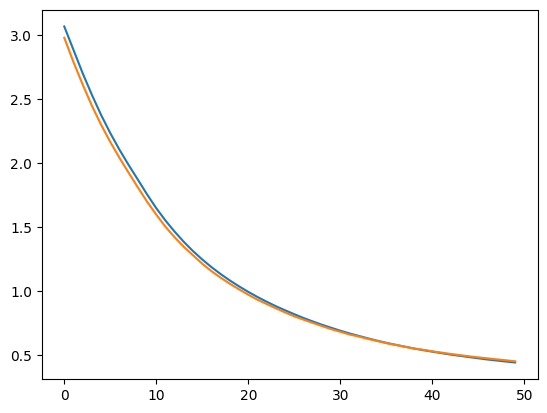

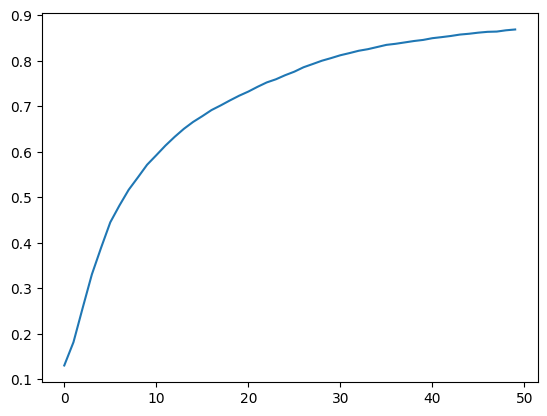

In [26]:
#dt = datetime.now()
#torch.save(ecnnmodel.state_dict(), "./models/eight_1cnn_architecture_model_" + dt.strftime("%m%d%Y_%H_%M_%S") + "0.000001lr_adam_bcewithlogits_32batchsize_balanced" + ".pt")
plt.plot(x_epoch, y_loss["train"], label="train")
plt.plot(x_epoch, y_loss["val"], label="val")
plt.show()
#plt.savefig("./visualizations/smallerEightCNNArchitectureLoss" + dt.strftime("%m%d%Y_%H_%M_%S") + "0.000001lr_adam_bcewithlogits_32batchsize_balanced" + ".png", bbox_inches="tight", pad_inches=0.3)
plt.plot(x_epoch, accuracy_vals, label="val")
plt.show()
#plt.savefig("./visualizations/smallerEightCNNArchitectureAcc" + dt.strftime("%m%d%Y_%H_%M_%S") + "0.000001lr_adam_bcewithlogits_32batchsize_balanced" + ".png", bbox_inches="tight", pad_inches=0.3)
#torch.save(ecnnmodel.state_dict(), "./models/eight_cnn_architecture_model_" + dt.strftime("%m%d%Y_%H_%M_%S_") + str(scheduler.get_last_lr()[0]) + "lr_adam_bcewithlogits_32batchsize_balanced" + ".pt")
#plt.savefig("./visualizations/smallerEightCNNArchitectureAcc" + dt.strftime("%m%d%Y_%H_%M_%S_") + str(scheduler.get_last_lr()[0]) + "lr_adam_bcewithlogits_32batchsize_balanced" + ".png", bbox_inches="tight", pad_inches=0.3)

In [33]:
import torch.nn.functional as F

def validation_step(batch):
    images, labels = batch
    images = images.to(device)
    labels = labels.to(device)
    labels = labels-1
    out = model(images)                   # Generate predictions
    loss = F.cross_entropy(out, labels)   # Calculate loss
    _, preds = torch.max(out, dim=1)
    acc =  torch.tensor(torch.sum(preds == labels).item() / len(preds))
    return {'val_loss': loss, 'val_acc': acc}

def validation_epoch_end(outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [validation_step(batch) for batch in val_loader]
    return validation_epoch_end(outputs)

print(evaluate(model, test_loader))
    

{'val_loss': 0.46092623472213745, 'val_acc': 0.8664663434028625}
